<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5701 entries, 0 to 5700
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   talk_id         5701 non-null   int64 
 1   title           5701 non-null   object
 2   speaker         5700 non-null   object
 3   recorded_date   5699 non-null   object
 4   published_date  5701 non-null   object
 5   event           5700 non-null   object
 6   duration        5701 non-null   int64 
 7   views           5701 non-null   int64 
 8   likes           5701 non-null   int64 
dtypes: int64(4), object(5)
memory usage: 401.0+ KB
None
   talk_id                            title           speaker recorded_date  \
0        1      Averting the climate crisis           Al Gore    2006-02-25   
1        7                 Simplicity sells       David Pogue    2006-02-24   
2       53              Greening the ghetto     Majora Carter    2006-02-26   
3       92  The best stats you've eve

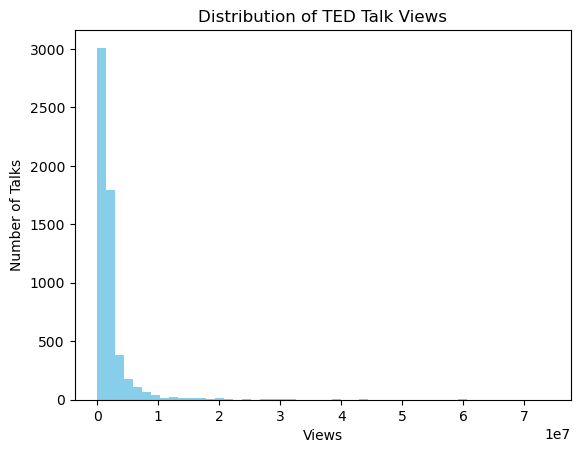

In [1]:
import pandas as pd
import matplotlib.pyplot as plt


df = pd.read_csv('c:\\Users\\Sai\\Documents\\mlnote\\NLP Task\\20221013_ted_talks.csv')


print(df.info())
print(df.head())

plt.hist(df['views'], bins=50, color='skyblue')
plt.xlabel('Views')
plt.ylabel('Number of Talks')
plt.title('Distribution of TED Talk Views')
plt.show()


In [2]:
df.head()
df.columns

Index(['talk_id', 'title', 'speaker', 'recorded_date', 'published_date',
       'event', 'duration', 'views', 'likes'],
      dtype='object')

In [3]:
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from wordcloud import WordCloud
import datetime
import pandas as pd

In [4]:

df['recorded_date'] = pd.to_datetime(df['recorded_date'], errors='coerce')
df['published_date'] = pd.to_datetime(df['published_date'], errors='coerce')

df['recorded_year'] = df['recorded_date'].dt.year
df['published_year'] = df['published_date'].dt.year
df['recorded_month'] = df['recorded_date'].dt.month
df['published_month'] = df['published_date'].dt.month

# Display the updated DataFrame
df.head()


,talk_id,title,speaker,recorded_date,published_date,event,duration,views,likes,recorded_year,published_year,recorded_month,published_month
0,1,Averting the climate crisis,Al Gore,2006-02-25,2006-06-27,TED2006,957,3681537,110000,2006.0,2006,2.0,6
1,7,Simplicity sells,David Pogue,2006-02-24,2006-06-27,TED2006,1266,2012797,60000,2006.0,2006,2.0,6
2,53,Greening the ghetto,Majora Carter,2006-02-26,2006-06-27,TED2006,1096,3006315,90000,2006.0,2006,2.0,6
3,92,The best stats you've ever seen,Hans Rosling,2006-02-22,2006-06-27,TED2006,1176,15432904,462000,2006.0,2006,2.0,6
4,66,Do schools kill creativity?,Sir Ken Robinson,2006-02-25,2006-06-27,TED2006,1151,73935964,2200000,2006.0,2006,2.0,6


C:\Users\Sai\AppData\Local\Temp\ipykernel_10476\379691487.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='recorded_year', data=df, palette='viridis')


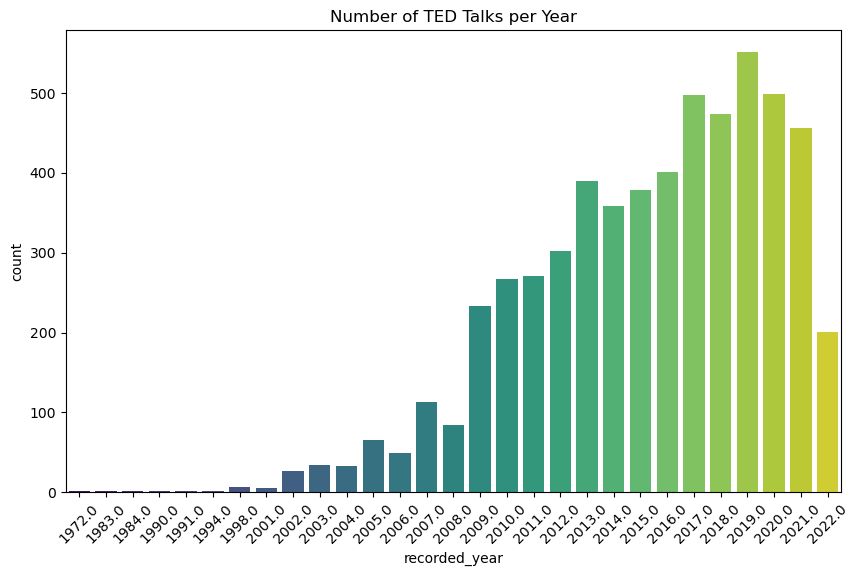

In [5]:
df['duration_minutes'] = df['duration'] / 60

plt.figure(figsize=(10, 6))
sns.countplot(x='recorded_year', data=df, palette='viridis')
plt.title('Number of TED Talks per Year')
plt.xticks(rotation=45)
plt.show()

In [6]:
top_10_views = df.nlargest(10, 'views')[['title','views','likes']]
print(top_10_views)

                                                  title     views    likes
4                           Do schools kill creativity?  73935964  2200000
1339           Your body language may shape who you are  66163329  1900000
2150         Inside the mind of a master procrastinator  63543965  1900000
672                    How great leaders inspire action  60129500  1800000
831                          The power of vulnerability  59438598  1700000
1768         How to speak so that people want to listen  51709191  1500000
2904                     My philosophy for a happy life  45113426  1300000
1940                 The next outbreak? We're not ready  44248349  1300000
2100  What makes a good life? Lessons from the longe...  43270567  1200000
449              10 things you didn't know about orgasm  39330527  1100000


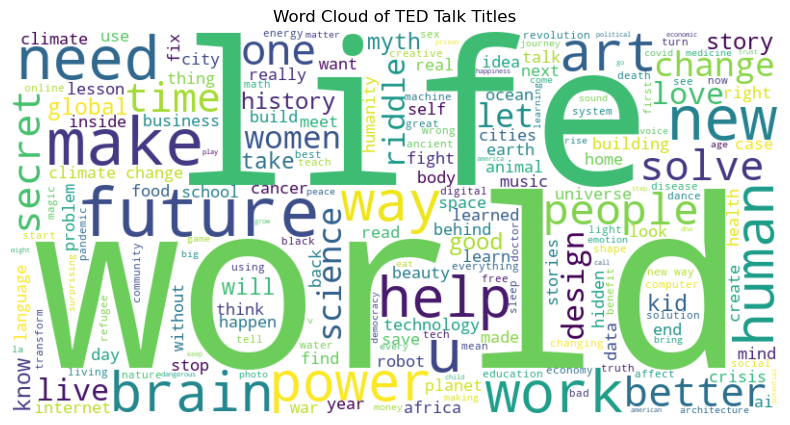

In [15]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Sample preprocessing function to handle None values and ensure return is a string
def preprocess_title(title):
    if pd.isna(title):
        return ''
    # Convert to lowercase and apply other preprocessing steps as needed
    return title.lower()

# Apply the preprocessing function to the 'title' column
df['cleaned_title'] = df['title'].apply(preprocess_title)

# Drop any rows where 'cleaned_title' is still empty after preprocessing
df = df[df['cleaned_title'] != '']

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(df['cleaned_title']))
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of TED Talk Titles')
plt.show()


In [17]:
tfidf = TfidfVectorizer()
tfidf_matrix = tfidf.fit_transform(df['cleaned_title'])
cosine_sim = cosine_similarity(tfidf_matrix)

def get_recommendations(title, cosine_sim=cosine_sim):
    idx = df[df['title'].str.contains(title, case=False, na= False)].index[0]
    
    #pairwise similarity scores for this talk
    sim_scores = list(enumerate(cosine_sim[idx]))

    # Sort the talks based on similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    
    #scores of the 5 most similar talks
    sim_scores = sim_scores[1:6]

    talk_indices = [i[0] for i in sim_scores]

    return df.iloc[talk_indices][['title','views','likes']]

print("Recommended talks similar to a given talks title:")
print(get_recommendations("The power of vulnerability"))


Recommended talks similar to a given talks title:
                                                  title    views   likes
4950        How vulnerability makes you a better leader  1639958   49000
2083  An art made of trust, vulnerability and connec...  3580777  107000
5649                            "Crush" / "Power Power"     4966     148
5008            Brené Brown on What Vulnerability Isn't    42349    1200
5025                                The Power of Spaces  1223920   36000
